In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## load Boston House Pricing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Check the decription of dataset

In [5]:
print(housing.DESCR)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

In [6]:
print(housing.data)

          Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1.0        60.0       RL         65.0   8450.0   Pave  None      Reg   
1        2.0        20.0       RL         80.0   9600.0   Pave  None      Reg   
2        3.0        60.0       RL         68.0  11250.0   Pave  None      IR1   
3        4.0        70.0       RL         60.0   9550.0   Pave  None      IR1   
4        5.0        60.0       RL         84.0  14260.0   Pave  None      IR1   
...      ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456.0        60.0       RL         62.0   7917.0   Pave  None      Reg   
1456  1457.0        20.0       RL         85.0  13175.0   Pave  None      Reg   
1457  1458.0        70.0       RL         66.0   9042.0   Pave  None      Reg   
1458  1459.0        20.0       RL         68.0   9717.0   Pave  None      Reg   
1459  1460.0        20.0       RL         75.0   9937.0   Pave  None      Reg   

     LandContour Utilities 

In [7]:
print(housing.target)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64


In [8]:
print(housing.feature_names)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [9]:
dataset = pd.DataFrame(housing.data)

In [10]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,RL,62.0,7917.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
1456,1457.0,20.0,RL,85.0,13175.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,MnPrv,None,0.0,2.0,2010.0,WD,Normal
1457,1458.0,70.0,RL,66.0,9042.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal
1458,1459.0,20.0,RL,68.0,9717.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2010.0,WD,Normal


In [11]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal


In [12]:
dataset["Price"]=housing.target

In [13]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Price
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   float64
 18  OverallC

## Summarize Stats of Data

In [15]:
dataset = dataset.drop(columns=['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'])
dataset = dataset.select_dtypes(include="number")

In [16]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   BsmtFinSF1     1460 non-null   float64
 8   BsmtFinSF2     1460 non-null   float64
 9   BsmtUnfSF      1460 non-null   float64
 10  TotalBsmtSF    1460 non-null   float64
 11  1stFlrSF       1460 non-null   float64
 12  2ndFlrSF       1460 non-null   float64
 13  LowQualFinSF   1460 non-null   float64
 14  GrLivArea      1460 non-null   float64
 15  BsmtFullBath   1460 non-null   float64
 16  BsmtHalfBath   1460 non-null   float64
 17  FullBath       1460 non-null   float64
 18  HalfBath

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Check Missing Values

In [17]:
pd.set_option('display.max_rows', None)
dataset.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
Price            0
dtype: int64

## Explore Data Analysis
## Correlation

In [18]:
dataset.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Price
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.005024,-0.005968,-0.007940,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479


In [19]:
import seaborn as sns

Text(0, 0.5, 'price')

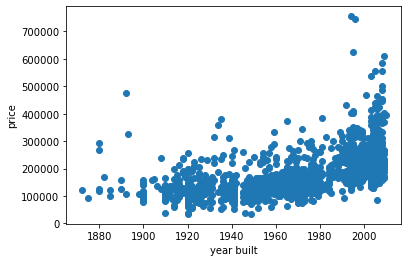

In [20]:
plt.scatter(dataset["YearBuilt"], dataset["Price"])
plt.xlabel("year built")
plt.ylabel("price")

Text(0, 0.5, 'price')

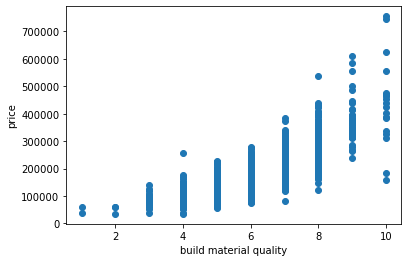

In [21]:
plt.scatter(dataset["OverallQual"], dataset["Price"])
plt.xlabel("build material quality")
plt.ylabel("price")

<AxesSubplot:xlabel='OverallQual', ylabel='Price'>

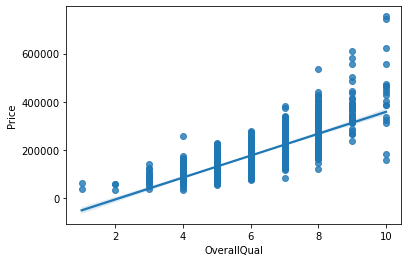

In [22]:
sns.regplot(x="OverallQual", y="Price", data=dataset)

<AxesSubplot:xlabel='EnclosedPorch', ylabel='Price'>

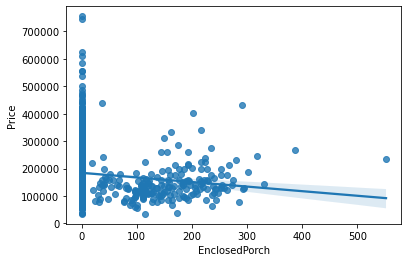

In [23]:
sns.regplot(x="EnclosedPorch", y="Price", data=dataset)

In [24]:
print(dataset.columns)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Price'],
      dtype='object')


## Independent and Dependent Features

In [25]:
x = dataset.loc[:, 'Id':'YrSold']
y = dataset.loc[:, 'Price']

In [26]:
x.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
1,2.0,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
2,3.0,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
3,4.0,70.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,0.0,540.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
4,5.0,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0


## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [28]:
x_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
135,136.0,20.0,10400.0,7.0,6.0,1970.0,1970.0,0.0,0.0,1304.0,...,530.0,98.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2008.0
1452,1453.0,180.0,3675.0,5.0,5.0,2005.0,2005.0,547.0,0.0,0.0,...,525.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,2006.0
762,763.0,60.0,8640.0,7.0,5.0,2009.0,2009.0,24.0,0.0,732.0,...,614.0,169.0,45.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
932,933.0,20.0,11670.0,9.0,5.0,2006.0,2006.0,0.0,0.0,1905.0,...,788.0,0.0,191.0,0.0,0.0,0.0,0.0,0.0,3.0,2007.0
435,436.0,60.0,10667.0,7.0,6.0,1996.0,1996.0,385.0,344.0,70.0,...,550.0,158.0,61.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0
629,630.0,80.0,9020.0,6.0,5.0,1964.0,1964.0,624.0,336.0,288.0,...,520.0,176.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0
1210,1211.0,60.0,11218.0,6.0,5.0,1992.0,1992.0,0.0,0.0,1055.0,...,462.0,635.0,104.0,0.0,0.0,0.0,0.0,400.0,5.0,2010.0
1118,1119.0,80.0,13825.0,5.0,6.0,1958.0,1987.0,0.0,0.0,533.0,...,300.0,280.0,34.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
1084,1085.0,60.0,13031.0,6.0,5.0,1995.0,1996.0,592.0,0.0,99.0,...,409.0,315.0,44.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0
158,159.0,60.0,12552.0,7.0,5.0,2004.0,2005.0,222.0,0.0,769.0,...,678.0,0.0,136.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0


## Standardizing the dataset

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
## x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
##       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
##       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
##       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
##       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
##       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
##       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
x_train = scaler.fit_transform(x_train)

In [34]:
## x_test = pd.DataFrame(scaler.transform(x_test), columns=['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
##       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
##       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
##      'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
##      'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
##      'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
##      'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'])
x_test = scaler.transform(x_test)

In [35]:
x_test

array([[ 0.37744788, -0.86894959, -0.20588081, ..., -0.12298707,
        -1.64752425, -1.36896114],
       [ 0.87785666,  0.0689424 ,  0.13339233, ..., -0.12298707,
        -0.89247054,  1.64954649],
       [-0.74788454, -0.63447659, -0.15766552, ..., -0.12298707,
        -1.2699974 ,  1.64954649],
       ...,
       [-0.19109167,  0.0689424 , -0.23140136, ..., -0.12298707,
        -0.51494368,  0.14029267],
       [-0.68680177, -0.1655306 ,  0.14204635, ...,  2.2441087 ,
         0.61763689,  0.89491958],
       [ 0.15661021,  0.0689424 ,  0.24483499, ..., -0.12298707,
         0.24011004,  0.89491958]])

In [36]:
x_train

array([[-1.40100022, -0.86894959, -0.03050433, ..., -0.12298707,
        -0.51494368,  0.14029267],
       [ 1.6930766 ,  2.88261838, -0.62436478, ..., -0.12298707,
        -0.51494368, -1.36896114],
       [ 0.07203407,  0.0689424 , -0.18592357, ..., -0.12298707,
        -0.13741682,  1.64954649],
       ...,
       [ 1.32188135, -0.86894959, -0.22725096, ..., -0.12298707,
        -0.89247054, -1.36896114],
       [ 0.3022691 , -0.1655306 , -0.27405334, ..., -0.12298707,
        -0.13741682, -0.61433423],
       [ 0.92719274,  1.47578039, -0.62357003, ..., -0.12298707,
        -0.13741682,  0.89491958]])

## Model Training

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
reg = LinearRegression()

In [39]:
reg.fit(x_train, y_train)

LinearRegression()

## Print Coefficients and Intercept

In [40]:
print(reg.coef_)

[-9.68108460e+02 -8.56697644e+03  4.48411188e+03  2.57522766e+04
  3.28970072e+03  9.88720093e+03  3.73795534e+03  2.22262699e+16
  7.30664502e+15  2.15513877e+16 -2.16199506e+16  2.99466780e+16
  3.39114613e+16  3.68612057e+15 -4.08184331e+16  6.19405527e+03
  1.42999397e+01  2.38526630e+03 -8.19990693e+02 -7.78218704e+03
 -2.02190156e+03  8.70814448e+03  3.13883519e+03  1.06954844e+04
 -1.09563384e+03  2.99483223e+03 -1.27190804e+03  5.13316249e+00
  1.41342579e+03  4.10670998e+03 -1.15291995e+03 -7.10372179e+02
 -9.91042748e+01 -1.95208769e+02]


In [41]:
print(reg.intercept_)

181313.54222848924


In [42]:
## Parameters the model has been trained
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [43]:
## Prediction with Test Data
reg_pred = reg.predict(x_test)

In [44]:
reg_pred

array([153521.65070525, 308102.91940672, 116853.35755643, 181313.29406907,
       302798.34957731,  44302.92210732, 227556.65806598, 149483.33330719,
        41556.0270816 , 151543.02792716, 157481.62822564, 114288.36578499,
        81031.30078591, 210928.60206101, 191425.10127301, 142533.08369601,
       216076.47442106, 136278.1702812 , 118798.03221161, 233891.69721959,
       186512.16197805, 216942.49730547, 194342.172178  , 133463.05499215,
       214716.89900275, 152350.57861593, 201010.50283894,  92609.80145855,
       186852.06539238, 179724.22052923, 116089.5157538 , 273039.23242747,
       230430.59651161,  88672.33021966, 270682.33676546, 163101.03867364,
       149138.41144545, 220243.39028807, 305539.46818767,  93915.54972824,
       135386.13547406, 254134.26970377, 103335.8363456 , 272921.6174155 ,
       131434.78442144, 130175.02094842, 104094.44664946, 130330.83157665,
       357457.97462299, 127242.23301643, 104900.02410807, 218890.61448788,
        91414.3040078 , 3

## Assumptions

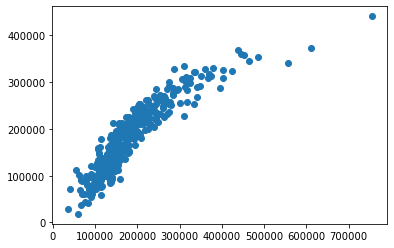

In [45]:
## Scatter Plot for Prediction
plt.scatter(y_test, reg_pred)

In [46]:
## Residuals
residuals = y_test - reg_pred

In [47]:
residuals

892        978.349295
1105     16897.080593
413      -1853.357556
522     -22313.294069
1036     12701.650423
614      31197.077893
218      83943.341934
1160     -3483.333307
649      42943.972918
887     -16043.027927
576     -12481.628226
1252     15711.634215
1061       -31.300786
567       3071.397939
1108    -10425.101273
1113     -8033.083696
168     -32576.474421
1102     -1278.170281
1120      -398.032212
67       -7891.697220
1040    -31512.161978
453      -6942.497305
670     -20842.172178
1094     -4463.054992
192     -22716.899003
123       1549.421384
415     -19876.502839
277      48390.198541
433      -5852.065392
1317     29175.779471
184      10910.484246
554      10960.767573
1173    -29930.596512
76       47077.669780
906     -15682.336765
674     -23101.038674
1398    -11138.411445
374       -743.390288
1032      4460.531812
259       3084.450272
51      -20886.135474
244     -49134.269704
1101     16164.163654
581     -19628.617415
679      -2934.784421
1132    -1

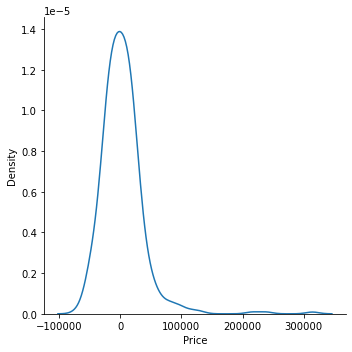

In [48]:
## Plot the Residuals
sns.displot(residuals, kind="kde")

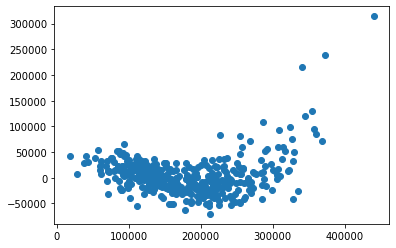

In [49]:
## Scatter plot Predictions and Residuals
## Uniform distribution
plt.scatter(reg_pred, residuals)

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

23349.443679892614
1280996232.7118306
35791.007707409284


## R Squared and Adjusted R Square

Formula

R^2 = 1 - SSR/SST

R^2 = coefficient of determination. SSR = sum of squares of residuals. SST = total sum of squares

In [51]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)
## highter score is better

0.816426050351694


Adjusted R^2 = 1 - [(1 - R^2) * (n - 1) / (n - k - 1)]

where:

R^2: the R^2 of the model. n: the number of observations. k: the number of predictor variables

In [52]:
# display Adjusted R^2
1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
# will be less than R^2

0.8009384218453853

## New Data Prediction

In [53]:
### NOT IN USE
newhousing = housing.data.drop(housing.data.columns[-1], axis=1)
newhousing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal
5,6.0,50.0,RL,85.0,14115.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,MnPrv,Shed,700.0,10.0,2009.0,WD,Normal
6,7.0,20.0,RL,75.0,10084.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,8.0,2007.0,WD,Normal
7,8.0,60.0,RL,NaN,10382.0,Pave,None,IR1,Lvl,AllPub,...,0.0,0.0,None,None,Shed,350.0,11.0,2009.0,WD,Normal
8,9.0,50.0,RM,51.0,6120.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,4.0,2008.0,WD,Abnorml
9,10.0,190.0,RL,50.0,7420.0,Pave,None,Reg,Lvl,AllPub,...,0.0,0.0,None,None,None,0.0,1.0,2008.0,WD,Normal


In [54]:
### NOT IN USE
newhousing.values[0].reshape(1,-1)

array([[1.0, 60.0, 'RL', 65.0, 8450.0, 'Pave', None, 'Reg', 'Lvl',
        'AllPub', 'Inside', 'Gtl', 'CollgCr', 'Norm', 'Norm', '1Fam',
        '2Story', 7.0, 5.0, 2003.0, 2003.0, 'Gable', 'CompShg',
        'VinylSd', 'VinylSd', 'BrkFace', 196.0, 'Gd', 'TA', 'PConc',
        'Gd', 'TA', 'No', 'GLQ', 706.0, 'Unf', 0.0, 150.0, 856.0, 'GasA',
        'Ex', 'Y', 'SBrkr', 856.0, 854.0, 0.0, 1710.0, 1.0, 0.0, 2.0,
        1.0, 3.0, 1.0, 'Gd', 8.0, 'Typ', 0.0, None, 'Attchd', 2003.0,
        'RFn', 2.0, 548.0, 'TA', 'TA', 'Y', 0.0, 61.0, 0.0, 0.0, 0.0,
        0.0, None, None, None, 0.0, 2.0, 2008.0, 'WD', 'Normal']],
      dtype=object)

In [112]:
rworld = x.values
rworld[0].reshape(1,-1)

array([[1.000e+00, 6.000e+01, 8.450e+03, 7.000e+00, 5.000e+00, 2.003e+03,
        2.003e+03, 7.060e+02, 0.000e+00, 1.500e+02, 8.560e+02, 8.560e+02,
        8.540e+02, 0.000e+00, 1.710e+03, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 8.000e+00, 0.000e+00, 2.000e+00,
        5.480e+02, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 2.008e+03]])

In [109]:
## Not in use
x_test[1].reshape(1,-1)

array([[ 0.87785666,  0.0689424 ,  0.13339233,  1.36557431, -0.50862358,
         0.74852168,  0.49393273,  1.27423353, -0.28033516, -0.31455229,
         0.9016723 ,  0.84821843,  1.74244818, -0.12031325,  2.05904031,
         1.11211537, -0.24766277,  0.76784032,  1.26551526,  0.13517503,
        -0.21231774,  1.50666236,  2.13174316,  0.29606343,  1.12737924,
         0.67198059, -0.25335995, -0.34637152, -0.11931726, -0.2758964 ,
        -0.06919277, -0.12298707, -0.89247054,  1.64954649]])

In [110]:
x_test[1]

array([ 0.87785666,  0.0689424 ,  0.13339233,  1.36557431, -0.50862358,
        0.74852168,  0.49393273,  1.27423353, -0.28033516, -0.31455229,
        0.9016723 ,  0.84821843,  1.74244818, -0.12031325,  2.05904031,
        1.11211537, -0.24766277,  0.76784032,  1.26551526,  0.13517503,
       -0.21231774,  1.50666236,  2.13174316,  0.29606343,  1.12737924,
        0.67198059, -0.25335995, -0.34637152, -0.11931726, -0.2758964 ,
       -0.06919277, -0.12298707, -0.89247054,  1.64954649])

In [102]:
## Transform new data
scaler.transform(rworld[0].reshape(1,-1))

array([[ 1.00000000e+00,  6.00000000e+01,  8.45000000e+03,
         7.00000000e+00,  5.00000000e+00,  2.00300000e+03,
         2.00300000e+03,  7.06000000e+02,  1.73811824e-18,
         1.50000000e+02,  8.56000000e+02,  8.56000000e+02,
         8.54000000e+02, -1.56430641e-17,  1.71000000e+03,
         1.00000000e+00, -1.73811824e-18,  2.00000000e+00,
         1.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         8.00000000e+00, -1.39049459e-17,  2.00000000e+00,
         5.48000000e+02,  4.34529560e-18,  6.10000000e+01,
        -5.21435471e-17, -3.99767195e-17, -2.95480100e-17,
        -3.47623648e-17,  2.95480100e-17,  2.00000000e+00,
         2.00800000e+03]])

In [103]:
reg.predict(scaler.transform(rworld[0].reshape(1,-1)))

array([-1.47869993e+19])

In [124]:
reg.predict(x_test[1].reshape(1,-1))

array([308089.54222849])

## Pickling the Model File for Development

In [62]:
import pickle

In [146]:
pickle.dump(reg, open('regmodel.pkl', 'wb'))

In [64]:
pickle_model = pickle.load(open('regmodel.pkl', 'rb'))

In [105]:
pickle_model.predict(scaler.transform(rworld[0].reshape(1,-1)))

array([-7.51084108e+18])

In [123]:
pickle_model.predict(x_test[1].reshape(1,-1))

array([308069.34370553])